In [1]:
#dataset link: https://www.kaggle.com/CooperUnion/anime-recommendations-database?select=rating.csv

# Weighted Average: For top rated anime page

In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
anime = pd.read_csv('anime.csv')

In [4]:
anime.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

In [5]:
anime = anime.drop(['type','episodes','genre'],axis=1)

In [6]:
anime.head()

,anime_id,name,rating,members
0,32281,Kimi no Na wa.,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,9.26,793665
2,28977,Gintama°,9.25,114262
3,9253,Steins;Gate,9.17,673572
4,9969,Gintama&#039;,9.16,151266


# W = (Rv+ Cm)/v+m

#W = Weighted Rating
#R = Ratings given(1-10)
#v = Number of votes given
#C = Mean of R
#m = Minimum votes required to be listed in top n positions

In [7]:
R = anime['rating']
v = anime['members']
C = anime['rating'].mean()
m = anime['members'].quantile(0.75)

In [8]:
anime['WeightedAverage'] = ((R*v)+(C*m))/(v+m)

In [9]:
anime.head()

,anime_id,name,rating,members,WeightedAverage
0,32281,Kimi no Na wa.,9.37,200630,9.239896
1,5114,Fullmetal Alchemist: Brotherhood,9.26,793665,9.227261
2,28977,Gintama°,9.25,114262,9.038211
3,9253,Steins;Gate,9.17,673572,9.132749
4,9969,Gintama&#039;,9.16,151266,9.002264


In [10]:
anime = anime .sort_values('WeightedAverage',ascending = False)
anime  = anime [['name','rating','members','WeightedAverage']]
anime .head()

,name,rating,members,WeightedAverage
0,Kimi no Na wa.,9.37,200630,9.239896
1,Fullmetal Alchemist: Brotherhood,9.26,793665,9.227261
3,Steins;Gate,9.17,673572,9.132749
6,Hunter x Hunter (2011),9.13,425855,9.072417
2,Gintama°,9.25,114262,9.038211


Text(0, 0.5, 'Anime')

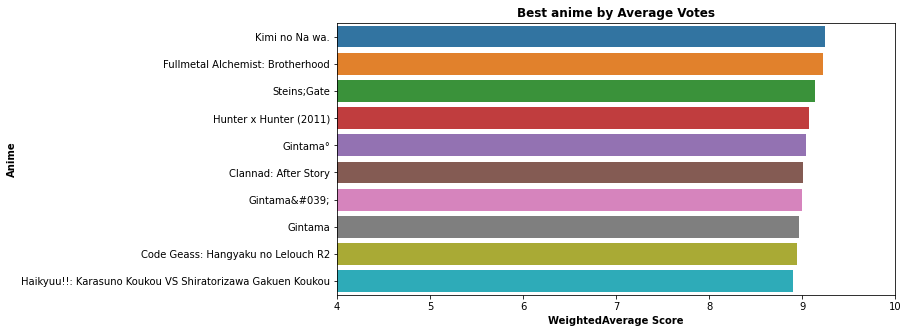

In [11]:
WeightedAverage = anime.sort_values('WeightedAverage',ascending = False)
plt.figure(figsize=(10,5))
axis1 = sns.barplot(x = WeightedAverage['WeightedAverage'].head(10), y =WeightedAverage['name'].head(10))
plt.xlim(4,10)
plt.title('Best anime by Average Votes', weight='bold')
plt.xlabel('WeightedAverage Score', weight='bold')
plt.ylabel('Anime', weight='bold')

# Colloborative Filtering: For might also like anime 

In [13]:
#Importing libraries
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from fuzzywuzzy import process
import warnings
warnings.filterwarnings("ignore")

In [14]:
anime ='anime.csv'
rating ='rating.csv'

In [15]:
anime1 = pd.read_csv('anime.csv')
rating1 = pd.read_csv('rating.csv')

In [16]:
anime1.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

In [17]:
anime = pd.read_csv(anime, usecols=['anime_id','name'], dtype={'anime_id':'int32','name':'str'})

In [18]:
anime.head()

,anime_id,name
0,32281,Kimi no Na wa.
1,5114,Fullmetal Alchemist: Brotherhood
2,28977,Gintama°
3,9253,Steins;Gate
4,9969,Gintama&#039;


In [19]:
rating1.columns

Index(['user_id', 'anime_id', 'rating'], dtype='object')

In [20]:
rating = pd.read_csv('rating.csv', usecols=['user_id','anime_id','rating'], dtype={'user_id':'int32','anime_id':'int32','rating':'int32'})

In [21]:
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [22]:
rating= rating.replace({-1:0})
rating.head()

,user_id,anime_id,rating
0,1,20,0
1,1,24,0
2,1,79,0
3,1,226,0
4,1,241,0


In [23]:
rating.shape

(7813737, 3)

In [24]:
rating.describe()

,user_id,anime_id,rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.332991e+00
std,2.099795e+04,8.883950e+03,3.368955e+00
min,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01


In [25]:
rating = rating.iloc[:1000000,:]

In [26]:
anime_rating = rating.pivot(index ='anime_id',columns ='user_id',values ='rating').fillna(0)

In [27]:
anime_rating

user_id,1,2,3,4,5,6,7,8,9,10,...,9349,9350,9351,9352,9353,9354,9355,9356,9357,9358
anime_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
mat_anime_rating =csr_matrix(anime_rating.values)

In [29]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors =30)
model.fit(anime_rating)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=30)

In [30]:
def recommender(anime_name, data, model, n_recommendations):
    model.fit(data)
    idx = process.extractOne(anime_name, anime['name'])[2]
    print('Anime selected:',anime['name'][idx])
    print('Recommendations based on selected anime are:')
    distances, indices = model.kneighbors(data[idx], n_neighbors =n_recommendations)
    print(distances,indices)
    
    for i in indices:
        print(anime['name'][i].where(i!=idx))
recommender('naruto shippuden', mat_anime_rating, model ,10)       

Anime selected: Naruto: Shippuuden
Recommendations based on selected anime are:
[[4.44089210e-16 4.66470339e-01 6.58431826e-01 7.45750128e-01
  7.48241108e-01 7.53640509e-01 7.54122856e-01 7.65091286e-01
  7.78835503e-01 7.78914500e-01]] [[ 615  818  400 4286 5585   99  692 4757 1914  748]]
615                                               NaN
818                        Macross Plus Movie Edition
400                                 Tiger &amp; Bunny
4286                          Mouryou no Hako Special
5585    Ginga Eiyuu Densetsu Gaiden: Ougon no Tsubasa
99                                          Barakamon
692                      InuYasha: Tenka Hadou no Ken
4757                                 Etotama Specials
1914       Rail of the Star: A True Story of Children
748                     Hellsing I: Digest for Freaks
Name: name, dtype: object


# Content-based Filtering: For similar anime page

In [31]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
from fuzzywuzzy import process
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
anime = 'anime.csv'

In [33]:
anime1 = pd.read_csv('anime.csv')

In [34]:
anime1.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

In [35]:
anime = pd.read_csv(anime, usecols=['anime_id','name','genre'], dtype={'anime_id':'int32','name':'str','genre':'str'})

In [36]:
anime.head()

,anime_id,name,genre
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural"
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili..."
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S..."
3,9253,Steins;Gate,"Sci-Fi, Thriller"
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S..."


In [37]:
df = anime
df.head()

,anime_id,name,genre
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural"
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili..."
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S..."
3,9253,Steins;Gate,"Sci-Fi, Thriller"
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S..."


In [38]:
df.shape

(12294, 3)

In [39]:
df.isnull().sum()

anime_id     0
name         0
genre       62
dtype: int64

In [40]:
df['genre'] = df['genre'].replace(np.nan, 'unknown')
df['genre'] = df['genre'].apply(lambda x: x.replace(', ',' '))
df.head()

,anime_id,name,genre
0,32281,Kimi no Na wa.,Drama Romance School Supernatural
1,5114,Fullmetal Alchemist: Brotherhood,Action Adventure Drama Fantasy Magic Military ...
2,28977,Gintama°,Action Comedy Historical Parody Samurai Sci-Fi...
3,9253,Steins;Gate,Sci-Fi Thriller
4,9969,Gintama&#039;,Action Comedy Historical Parody Samurai Sci-Fi...


In [41]:
df.isnull().sum()

anime_id    0
name        0
genre       0
dtype: int64

In [42]:
df.drop_duplicates(subset=None,inplace=True)
df.head()

,anime_id,name,genre
0,32281,Kimi no Na wa.,Drama Romance School Supernatural
1,5114,Fullmetal Alchemist: Brotherhood,Action Adventure Drama Fantasy Magic Military ...
2,28977,Gintama°,Action Comedy Historical Parody Samurai Sci-Fi...
3,9253,Steins;Gate,Sci-Fi Thriller
4,9969,Gintama&#039;,Action Comedy Historical Parody Samurai Sci-Fi...


In [43]:
df.drop_duplicates(subset=None,inplace=True)
df.head()

,anime_id,name,genre
0,32281,Kimi no Na wa.,Drama Romance School Supernatural
1,5114,Fullmetal Alchemist: Brotherhood,Action Adventure Drama Fantasy Magic Military ...
2,28977,Gintama°,Action Comedy Historical Parody Samurai Sci-Fi...
3,9253,Steins;Gate,Sci-Fi Thriller
4,9969,Gintama&#039;,Action Comedy Historical Parody Samurai Sci-Fi...


In [44]:
df.reset_index(inplace=True)
df.head()

,index,anime_id,name,genre
0,0,32281,Kimi no Na wa.,Drama Romance School Supernatural
1,1,5114,Fullmetal Alchemist: Brotherhood,Action Adventure Drama Fantasy Magic Military ...
2,2,28977,Gintama°,Action Comedy Historical Parody Samurai Sci-Fi...
3,3,9253,Steins;Gate,Sci-Fi Thriller
4,4,9969,Gintama&#039;,Action Comedy Historical Parody Samurai Sci-Fi...


In [45]:
genres=[]
for genre in df.genre:
    
    x=genre.split('|')
    for i in x:
         if i not in genres:
            genres.append(str(i))
genres=str(genres)    
anime_title=[]
for title in df.name:
    anime_title.append(title[0:-7])
anime_title=str(anime_title)    

In [46]:
wordcloud_genre=WordCloud(width=1500,height=800,background_color='black',min_font_size=2
                    ,min_word_length=3).generate(genres)
wordcloud_title=WordCloud(width=1500,height=800,background_color='cyan',min_font_size=2
                    ,min_word_length=3).generate(anime_title)

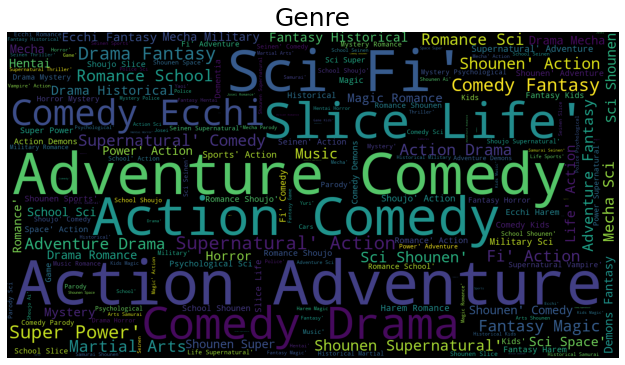

In [47]:
plt.figure(figsize=(20,6))
plt.axis('off')
plt.title('Genre',fontsize=25)
plt.imshow(wordcloud_genre)

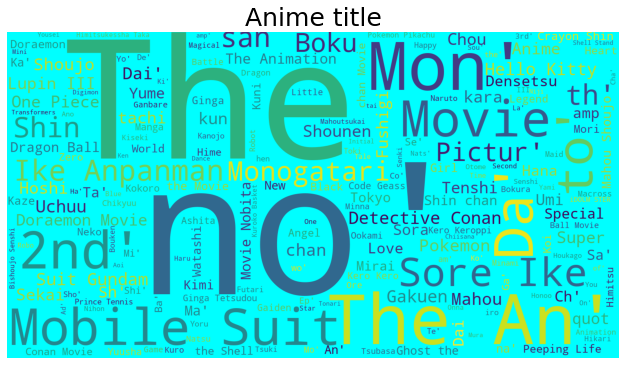

In [48]:
plt.figure(figsize=(20,6))
plt.axis('off')
plt.title('Anime title',fontsize=25)
plt.imshow(wordcloud_title)

In [49]:
def combine_features(row):
    try:
        return row['name']+' '+row['genre']
    except:
        print("Error:",row)

In [50]:
df['combined_features'] = df.apply(combine_features,axis = 1)
df['combined_features'].head()

0     Kimi no Na wa. Drama Romance School Supernatural
1    Fullmetal Alchemist: Brotherhood Action Advent...
2    Gintama° Action Comedy Historical Parody Samur...
3                          Steins;Gate Sci-Fi Thriller
4    Gintama&#039; Action Comedy Historical Parody ...
Name: combined_features, dtype: object

In [51]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df['combined_features'] = df['combined_features'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['combined_features'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(12294, 12003)

In [52]:
#Array mapping from feature integer indices to feature name.
tfidf.get_feature_names()[5000:5010]

['kakusan',
 'kakusareta',
 'kakusei',
 'kakusen',
 'kakusensou',
 'kakushi',
 'kakutou',
 'kakuyaku',
 'kakyou',
 'kakyuusei']

In [53]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [54]:
cosine_sim.shape

(12294, 12294)

In [55]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df.index, index=df['name']).drop_duplicates()

In [56]:
indices[:10]

name
Kimi no Na wa.                                               0
Fullmetal Alchemist: Brotherhood                             1
Gintama°                                                     2
Steins;Gate                                                  3
Gintama&#039;                                                4
Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou    5
Hunter x Hunter (2011)                                       6
Ginga Eiyuu Densetsu                                         7
Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare          8
Gintama&#039;: Enchousen                                     9
dtype: int64

In [57]:
# Function that takes in anime title as input and outputs most similar anime
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the anime that matches the title
    idx = process.extractOne(title, df['name'])[2]
    print('Anime selected:',df['name'][idx])
    print('Recommendations based on selected anime are:')
    # Get the pairwsie similarity scores of all anime with that anime
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the anime based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar anime
    sim_scores = sim_scores[1:11]

    # Get the anime indices
    anime_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar anime
    return df['name'].iloc[anime_indices]

In [58]:
get_recommendations('naruto')

Movie selected: Naruto
Recommendations based on selected anime are:


719                            The Last: Naruto the Movie
615                                    Naruto: Shippuuden
1343                                          Naruto x UT
486                              Boruto: Naruto the Movie
2458                 Naruto Shippuuden: Sunny Side Battle
784            Naruto: Shippuuden Movie 6 - Road to Ninja
1103    Boruto: Naruto the Movie - Naruto ga Hokage ni...
1472          Naruto: Shippuuden Movie 4 - The Lost Tower
2416    Naruto: Honoo no Chuunin Shiken! Naruto vs. Ko...
2997    Naruto Soyokazeden Movie: Naruto to Mashin to ...
Name: name, dtype: object

In [60]:
get_recommendations('hunter x huntr')

Movie selected: Hunter x Hunter
Recommendations based on selected anime are:


145                         Hunter x Hunter OVA
2046                      Hunter x Hunter Pilot
6                        Hunter x Hunter (2011)
2108    Hunter x Hunter Movie: The Last Mission
202               Hunter x Hunter: Greed Island
1974       Hunter x Hunter Movie: Phantom Rouge
146         Hunter x Hunter: Greed Island Final
4003                             Vampire Hunter
390                               City Hunter 2
523                                 City Hunter
Name: name, dtype: object

In [61]:
get_recommendations('naruto shippuden')

Movie selected: Naruto: Shippuuden
Recommendations based on selected anime are:


841                                                Naruto
2458                 Naruto Shippuuden: Sunny Side Battle
784            Naruto: Shippuuden Movie 6 - Road to Ninja
1472          Naruto: Shippuuden Movie 4 - The Lost Tower
719                            The Last: Naruto the Movie
1828                  Naruto: Shippuuden Movie 2 - Kizuna
1237            Naruto: Shippuuden Movie 5 - Blood Prison
1827                           Naruto: Shippuuden Movie 1
1573    Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...
1343                                          Naruto x UT
Name: name, dtype: object